In [105]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
pdbs = os.listdir("./pdbPF00018")

In [20]:
# create all structural alignments
for i in range(len(pdbs)):
    for j in range(i + 1, len(pdbs)):
        os.system(f"./TMalign ./pdbPF00018/{pdbs[i]} ./pdbPF00018/{pdbs[j]} -a > results/{pdbs[i][:-4]}_{pdbs[j][:-4]}.out")

In [96]:
# read all structural alignments, retrieve TM-score
alignments = os.listdir("./results")

# get rid of hidden files (.DS_Store)
alignments = [a for a in alignments if not a.startswith(".")]

# pdb names without extension
trimmed_pdbs = [pdb[:-4] for pdb in pdbs]

distance_matrix = pd.DataFrame(index = trimmed_pdbs, columns = trimmed_pdbs)

# Elements on the main diagonal are all 1s (structural aligment of pdb with the same pdb)
for trimmed_pdb in trimmed_pdbs:
    distance_matrix.loc[trimmed_pdb, trimmed_pdb] = 1

for alignment in alignments:
    textfile = open('./results/' + alignment, 'r')
    filetext = textfile.read()
    textfile.close()
    
    # Normalized by average length of chains
    normalized_tm_score = float(re.findall("TM-score= \d+\.\d+", filetext)[2].split("= ")[1])    
    pdb1, pdb2 = alignment[:-4].split("_")
    
    distance_matrix.loc[pdb1, pdb2] = normalized_tm_score
    distance_matrix.loc[pdb2, pdb1] = normalized_tm_score

In [97]:
distance_matrix

,2gqi,1aze,2dl5,5fwb,5o2m,1aww,2dyb,2yup,2yuq,5ul6,...,1awo,3rbb,1k4u,4cc2,2iim,2ekh,2ed1,6b25,1uhc,1ov3
2gqi,1,0.72074,0.69017,0.7221,0.65463,0.71388,0.29225,0.59159,0.6517,0.77125,...,0.65496,0.2784,0.6749,0.6987,0.76398,0.66653,0.74158,0.5606,0.65726,0.50078
1aze,0.72074,1,0.71523,0.77029,0.67031,0.72664,0.29532,0.65082,0.68046,0.83176,...,0.73915,0.2043,0.75195,0.75398,0.78447,0.6842,0.73051,0.57745,0.66512,0.50549
2dl5,0.69017,0.71523,1,0.72439,0.67277,0.69871,0.28992,0.58422,0.62638,0.74808,...,0.64886,0.29582,0.68271,0.70225,0.70986,0.67935,0.67966,0.53133,0.6685,0.49814
5fwb,0.7221,0.77029,0.72439,1,0.69894,0.7559,0.30384,0.62227,0.69777,0.85424,...,0.6892,0.24011,0.74939,0.8093,0.83018,0.68436,0.70281,0.59702,0.71817,0.56367
5o2m,0.65463,0.67031,0.67277,0.69894,1,0.70223,0.31902,0.55583,0.59076,0.71507,...,0.602,0.2095,0.67932,0.68866,0.67667,0.61883,0.66568,0.52332,0.64831,0.49287
1aww,0.71388,0.72664,0.69871,0.7559,0.70223,1,0.28929,0.5833,0.65478,0.77641,...,0.64405,0.26018,0.7101,0.71635,0.71939,0.64677,0.70961,0.55736,0.65668,0.50947
2dyb,0.29225,0.29532,0.28992,0.30384,0.31902,0.28929,1,0.31141,0.29117,0.31162,...,0.28106,0.20146,0.30208,0.29718,0.30766,0.2923,0.29835,0.26281,0.28786,0.24968
2yup,0.59159,0.65082,0.58422,0.62227,0.55583,0.5833,0.31141,1,0.58661,0.64453,...,0.58462,0.21465,0.63513,0.60012,0.6329,0.56971,0.6242,0.50571,0.57589,0.42969
2yuq,0.6517,0.68046,0.62638,0.69777,0.59076,0.65478,0.29117,0.58661,1,0.72785,...,0.60635,0.22445,0.64876,0.68954,0.69336,0.57657,0.67314,0.52603,0.63983,0.46424
5ul6,0.77125,0.83176,0.74808,0.85424,0.71507,0.77641,0.31162,0.64453,0.72785,1,...,0.71433,0.207,0.79747,0.81524,0.85558,0.69148,0.76164,0.61051,0.71912,0.5406


In [112]:
# Nearest Point Algorithm
Z1 = linkage(distance_matrix)

In [113]:
# UPGMA
Z2 = linkage(distance_matrix, method="average")

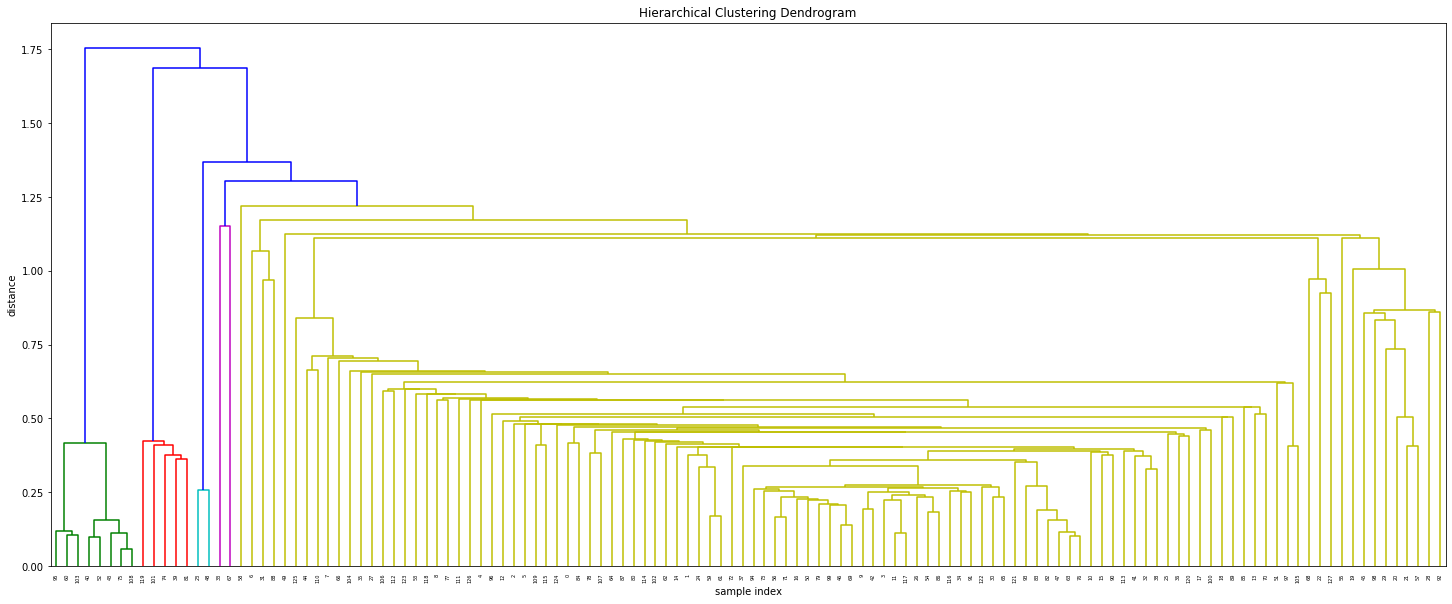

In [114]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z1)
plt.show()

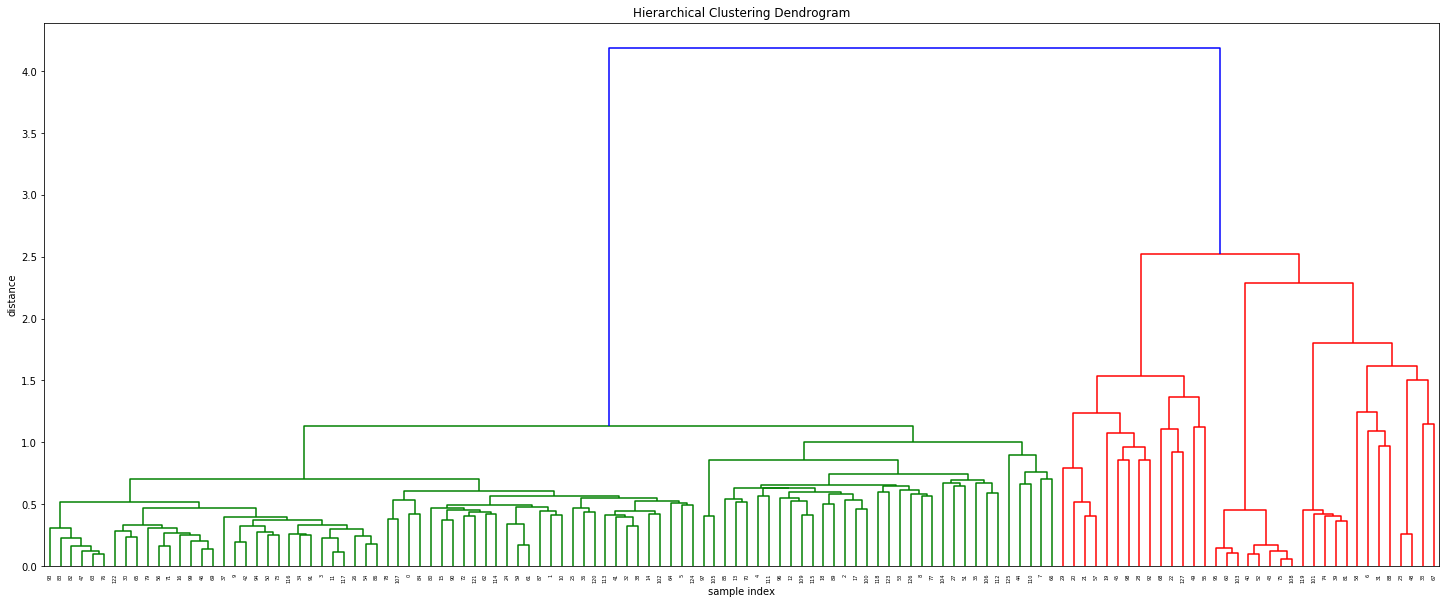

In [116]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z2)
plt.show()